In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

houseprices = pd.read_csv('DKHousingPricesSample100k.csv')

houseprices = houseprices.drop(columns=['address', 'zip_code', 'nom_interest_rate%', 'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%'])
houseprices.info()
empty_column = houseprices[houseprices['city'].isnull()]
houseprices.loc[houseprices['city'].isnull(), 'city'] = 'Tunø'
print(houseprices.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   date                                 100000 non-null  object 
 1   quarter                              100000 non-null  object 
 2   house_id                             100000 non-null  int64  
 3   house_type                           100000 non-null  object 
 4   sales_type                           100000 non-null  object 
 5   year_build                           100000 non-null  int64  
 6   purchase_price                       100000 non-null  int64  
 7   %_change_between_offer_and_purchase  100000 non-null  float64
 8   no_rooms                             100000 non-null  int64  
 9   sqm                                  100000 non-null  float64
 10  sqm_price                            100000 non-null  float64
 11  city          

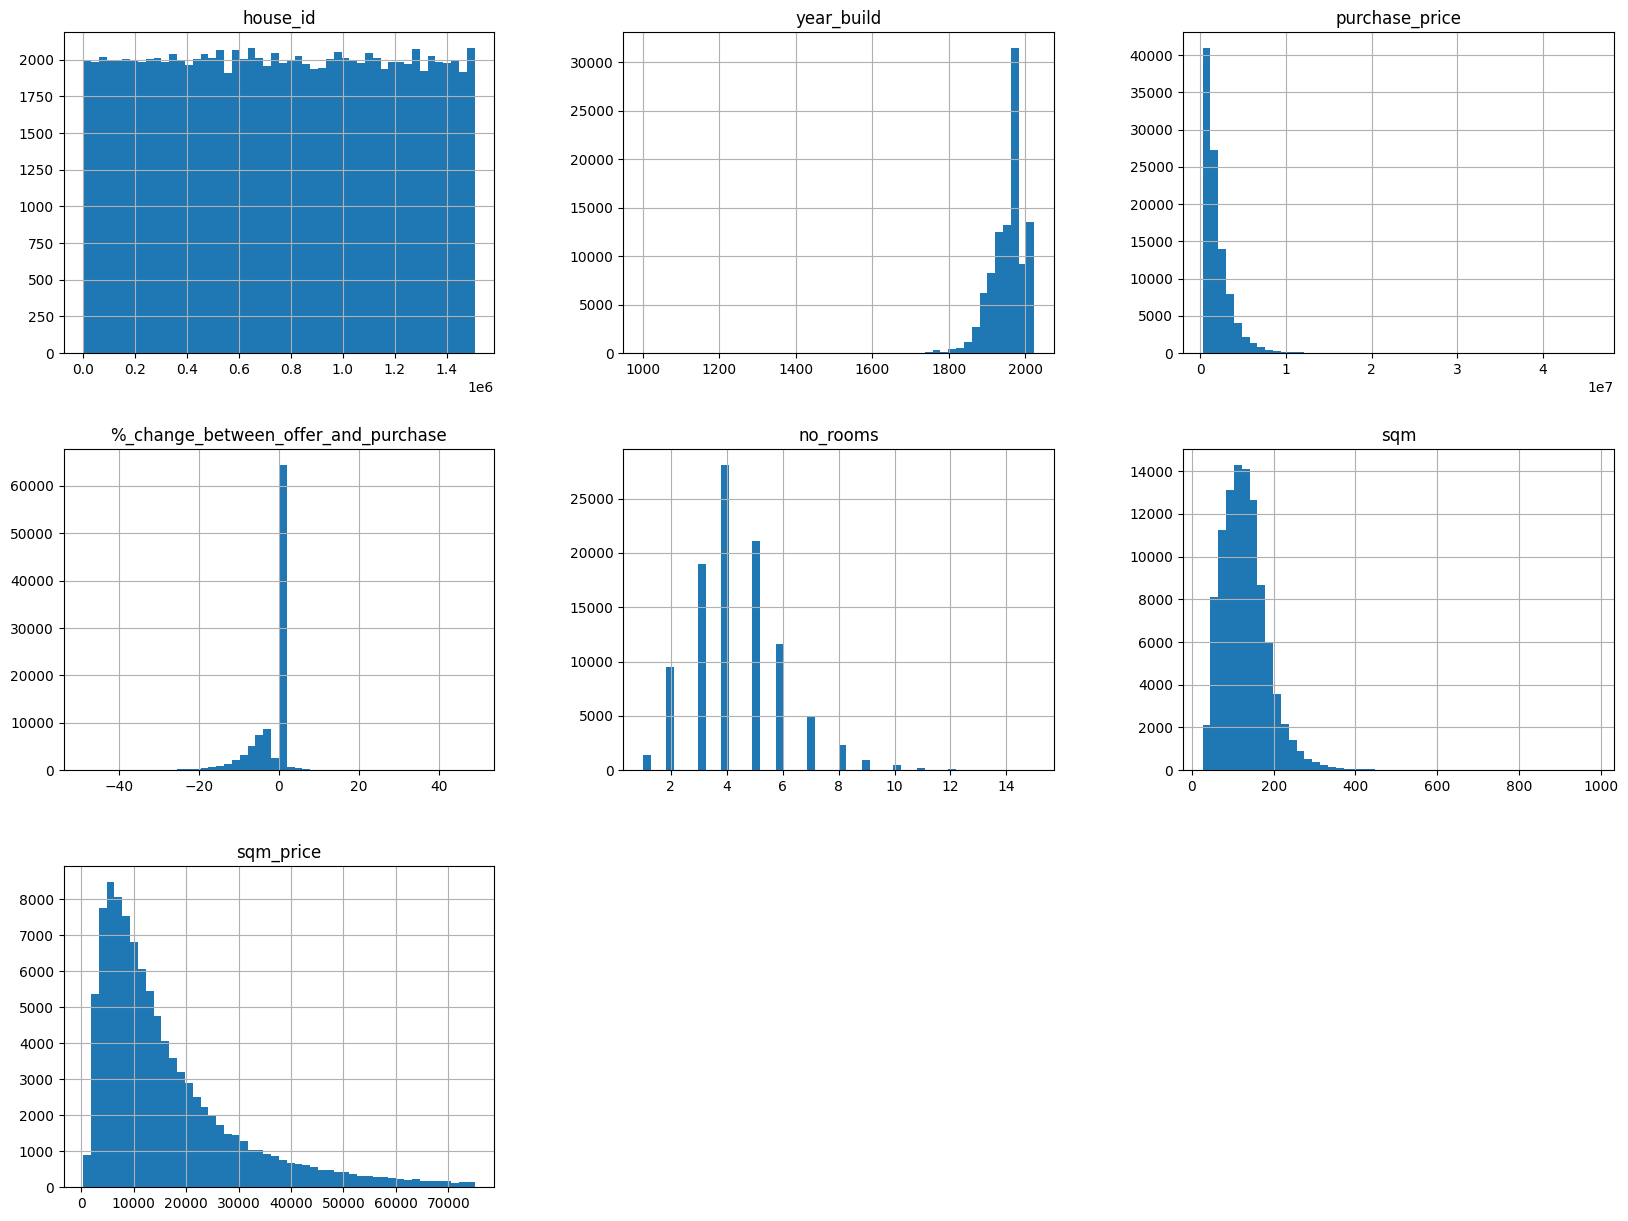

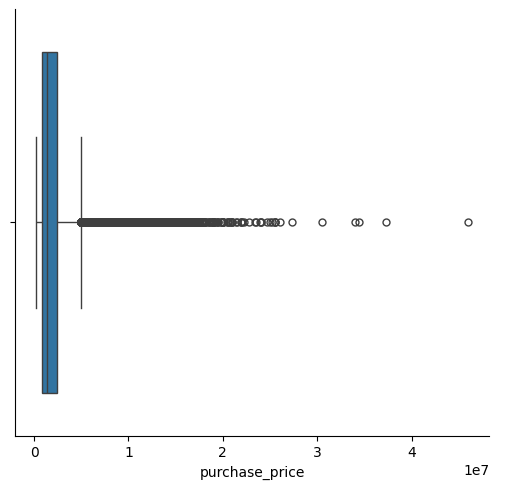

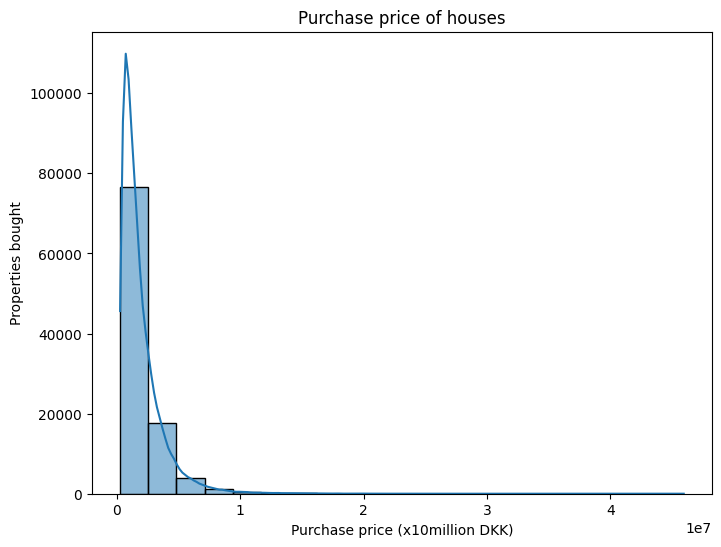

In [2]:
houseprices.hist(bins=50, figsize=(20, 15))
plt.show()

sns.catplot(data=houseprices, x="purchase_price", kind="box")
houseprices.describe()

plt.figure(figsize=(8, 6))
sns.histplot(houseprices['purchase_price'], bins=20, kde=True) 
plt.title("Purchase price of houses")
plt.xlabel("Purchase price (x10million DKK)") 
plt.ylabel("Properties bought") 
plt.show()

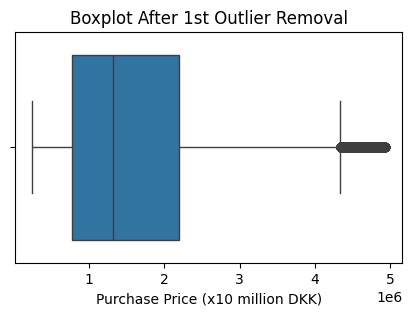

New Lower Bound: -1675000.0
New Upper Bound: 4925000.0


In [35]:
Q1 = houseprices['purchase_price'].quantile(0.25)
Q3 = houseprices['purchase_price'].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

houseprices_cleaned = houseprices[(houseprices['purchase_price'] >= lower_bound) & (houseprices['purchase_price'] <= upper_bound)]

outliers = houseprices[~houseprices.index.isin(houseprices_cleaned.index)]

plt.figure(figsize=(5, 3))
sns.boxplot(x=houseprices_cleaned['purchase_price'])
plt.title("Boxplot After 1st Outlier Removal")
plt.xlabel("Purchase Price (x10 million DKK)")
plt.show()

print(f"New Lower Bound: {lower_bound}")
print(f"New Upper Bound: {upper_bound}")

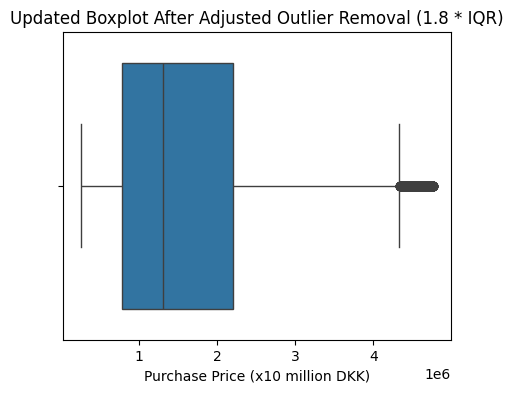

New Lower Bound: -1790000.0
New Upper Bound: 4765000.0


In [34]:
Q1_new = houseprices_cleaned['purchase_price'].quantile(0.25)
Q3_new = houseprices_cleaned['purchase_price'].quantile(0.75) 
IQR_new = Q3_new - Q1_new 


lower_bound_new = Q1_new - 1.8 * IQR_new 
upper_bound_new = Q3_new + 1.8 * IQR_new 

df = houseprices_cleaned[
    (houseprices_cleaned['purchase_price'] >= lower_bound_new) & 
    (houseprices_cleaned['purchase_price'] <= upper_bound_new)
]


plt.figure(figsize=(5, 4))
sns.boxplot(x=df['purchase_price'])
plt.title("Updated Boxplot After Adjusted Outlier Removal (1.8 * IQR)")
plt.xlabel("Purchase Price (x10 million DKK)")
plt.show()

print(f"New Lower Bound: {lower_bound_new}")
print(f"New Upper Bound: {upper_bound_new}")

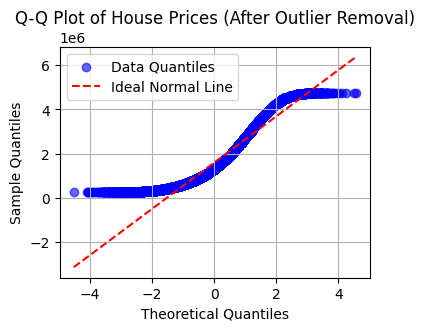

In [39]:
sorted_data = np.sort(df['purchase_price'])

n = len(sorted_data)
theoretical_quantiles = np.linspace(0, 1, n)

normal_quantiles = np.quantile(np.random.normal(0, 1, n), theoretical_quantiles)

plt.figure(figsize=(4, 3))
plt.scatter(normal_quantiles, sorted_data, color='blue', alpha=0.6, label="Data Quantiles")
plt.plot(normal_quantiles, normal_quantiles * np.std(sorted_data) + np.mean(sorted_data), 
         color='red', linestyle='dashed', label="Ideal Normal Line")

plt.title("Q-Q Plot of House Prices (After Outlier Removal)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.legend()
plt.grid()
plt.show()

### Columns we do not use:
address, zip_code, nom_interest_rate%, dk_ann_infl_rate% & yield_on_mortgage_credit_bonds%